# Exploratory Data Analysis

https://www.kaggle.com/datasets/agungpambudi/network-malware-detection-connection-analysis/data


Style guides:
* Mostly meets [PEP-8](https://peps.python.org/pep-0008/)

Import dependencies, define a method

In [1]:
# Define some exclusions for PEP8 that don't apply when the Jupyter Notebook
#   is exported to .py file
# pylint: disable=pointless-statement
# pylint: disable=fixme
# pylint: disable=expression-not-assigned
# pylint: disable=missing-module-docstring
# pylint: disable=invalid-name

import os
# import sys
from math import isnan

import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

sns.set_theme()

def pretty_print_dict(dictname):
    """prints a dict in an easier to read table format"""
    # max_key_length = max(len(ele) for ele in dictname.keys()) + 1
    FORMAT_STRING="{:<30} {:<30}"
    print(FORMAT_STRING.format('Key','Value'))
    for k, v in dictname.items():
        print(FORMAT_STRING.format(k, v))

### Load the data into a Pandas dataframe

Define the path to the dataset file

Define the name of the label column

In [2]:
rootdir = os.getcwd()
infile = os.path.join(rootdir, 'data',
                      'CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv')


LABEL_COLUMN_NAME = 'label_bool'

df = pd.read_csv(infile, delimiter='|', na_values='-')

# df['label_num'] = df['label'].apply(lambda x: 1 if x in ['Malicious   C&C'] else 0)
df[LABEL_COLUMN_NAME] = df['label'].isin(['Malicious   C&C']).astype(int).astype(bool)
df.drop(columns=['label', 'detailed-label'], inplace=True)

# 'label': ['Benign', 'Malicious   C&C'],

Preview the first 5 rows

In [3]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label_bool
0,1.538479e+09,CSQG794riQ4XnzTxP2,192.168.100.103,37082,192.168.100.1,53,udp,dns,5.005151,78.0,...,NaN,NaN,0,D,2,134,0,0,NaN,False
1,1.538479e+09,COTbdG2BhtGBlmf6r,192.168.100.103,34486,192.168.100.1,53,udp,dns,0.007243,90.0,...,NaN,NaN,0,Dd,2,146,2,146,NaN,False
2,1.538479e+09,CP48WJ2HOnLuGtr5kb,192.168.100.103,37601,192.168.100.1,53,udp,dns,0.002250,90.0,...,NaN,NaN,0,Dd,2,146,2,146,NaN,False
3,1.538479e+09,CeTMJi2TydRSaVdsG4,192.168.100.103,46439,192.168.100.1,53,udp,dns,5.005154,78.0,...,NaN,NaN,0,D,2,134,0,0,NaN,False
4,1.538479e+09,CZ6ne24AN9WAg9XA9d,192.168.100.103,55174,192.168.100.1,53,udp,dns,0.002246,90.0,...,NaN,NaN,0,Dd,2,146,2,146,NaN,False


## Common statistics for features

In [4]:
# store the number of rows for use below
num_rows = df.shape[0]

# include non-numeric columns and other statistical data too:
df_desc = df.describe(include='all')

df_desc

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label_bool
count,3.209000e+03,3209,3209,3209.000000,3209,3209.000000,3209,592,2324.000000,2324.000000,...,0.0,0.0,3209.000000,3209,3209.000000,3209.000000,3209.000000,3209.000000,0.0,3209
unique,NaN,3209,3,NaN,40,NaN,2,1,NaN,NaN,...,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,2
top,NaN,CSQG794riQ4XnzTxP2,192.168.100.103,NaN,217.30.75.147,NaN,udp,dns,NaN,NaN,...,NaN,NaN,NaN,Dd,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,3207,NaN,1301,NaN,3192,592,NaN,NaN,...,NaN,NaN,NaN,2130,NaN,NaN,NaN,NaN,NaN,3193
mean,1.538518e+09,NaN,NaN,8939.868806,NaN,113.302586,NaN,NaN,37.898508,72.502582,...,NaN,NaN,2.387348,NaN,6.490807,310.303521,6.349018,291.973824,NaN,NaN
std,2.765683e+04,NaN,NaN,18604.179531,NaN,99.275039,NaN,NaN,1258.145009,556.850057,...,NaN,NaN,88.679133,NaN,214.346608,9010.262223,224.835352,9432.739603,NaN,NaN
min,1.538479e+09,NaN,NaN,123.000000,NaN,22.000000,NaN,NaN,0.000480,0.000000,...,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.538494e+09,NaN,NaN,123.000000,NaN,123.000000,NaN,NaN,0.002744,48.000000,...,NaN,NaN,0.000000,NaN,1.000000,76.000000,0.000000,0.000000,NaN,NaN
50%,1.538513e+09,NaN,NaN,123.000000,NaN,123.000000,NaN,NaN,0.005746,48.000000,...,NaN,NaN,0.000000,NaN,1.000000,76.000000,1.000000,76.000000,NaN,NaN
75%,1.538542e+09,NaN,NaN,123.000000,NaN,123.000000,NaN,NaN,0.056341,48.000000,...,NaN,NaN,0.000000,NaN,1.000000,76.000000,1.000000,76.000000,NaN,NaN


### View the data types for all columns

In [5]:
df.dtypes

ts                float64
uid                object
id.orig_h          object
id.orig_p           int64
id.resp_h          object
id.resp_p           int64
proto              object
service            object
duration          float64
orig_bytes        float64
resp_bytes        float64
conn_state         object
local_orig        float64
local_resp        float64
missed_bytes        int64
history            object
orig_pkts           int64
orig_ip_bytes       int64
resp_pkts           int64
resp_ip_bytes       int64
tunnel_parents    float64
label_bool           bool
dtype: object

### Infer the data types for all columns

Get insight into which features whose data types may have been improperly detected by Pandas and need to be changed.

In [6]:
# initialize an empty dict for storing results
types_dict = {}

for column in df.columns:
    types_dict[column] = pd.api.types.infer_dtype(df[column])

types_dict

{'ts': 'floating',
 'uid': 'string',
 'id.orig_h': 'string',
 'id.orig_p': 'integer',
 'id.resp_h': 'string',
 'id.resp_p': 'integer',
 'proto': 'string',
 'service': 'string',
 'duration': 'floating',
 'orig_bytes': 'floating',
 'resp_bytes': 'floating',
 'conn_state': 'string',
 'local_orig': 'floating',
 'local_resp': 'floating',
 'missed_bytes': 'integer',
 'history': 'string',
 'orig_pkts': 'integer',
 'orig_ip_bytes': 'integer',
 'resp_pkts': 'integer',
 'resp_ip_bytes': 'integer',
 'tunnel_parents': 'floating',
 'label_bool': 'boolean'}

### Determine which features have the highest variance

In [7]:
# Define the maximum number of columns/features to display variance info about
TOP_NUM_OF_FEAT_VARIANCE = 10

# create a list of the features that are numeric
numeric_column_names = df.select_dtypes(include=np.number).columns.tolist()

# If the user specifies more features/columns than are available, then just
# use all of them
TOP_NUM_OF_FEAT_VARIANCE = min(TOP_NUM_OF_FEAT_VARIANCE,
                               len(numeric_column_names)-1)

# create a dataframe that describes just the numeric features
df_numeric_desc = df[numeric_column_names].describe(include='all')

# https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_values.html
print('Numerical features with the highest variance')
df_numeric_desc.loc['std'].sort_values(ascending=False)[0:TOP_NUM_OF_FEAT_VARIANCE-1]

Numerical features with the highest variance


ts               27656.834462
id.orig_p        18604.179531
resp_ip_bytes     9432.739603
orig_ip_bytes     9010.262223
duration          1258.145009
orig_bytes         556.850057
resp_bytes         553.773292
resp_pkts          224.835352
orig_pkts          214.346608
Name: std, dtype: float64

# Plot a histagram for a specific feature

In [8]:
## plot on a specific feature using Seaborn
#sns.histplot(data=df, x="service")

# optionally save it as a PNG file
# plt.savefig(rootdir + '/histogram-age.png')

### Count the number of rows with missing values
Ordered by most to fewest missing values

In [9]:
nan_count = np.sum(df.isnull(), axis = 0).sort_values(ascending=False)
nan_count

tunnel_parents    3209
local_orig        3209
local_resp        3209
service           2617
duration           885
orig_bytes         885
resp_bytes         885
ts                   0
missed_bytes         0
resp_ip_bytes        0
resp_pkts            0
orig_ip_bytes        0
orig_pkts            0
history              0
conn_state           0
uid                  0
proto                0
id.resp_p            0
id.resp_h            0
id.orig_p            0
id.orig_h            0
label_bool           0
dtype: int64

# Looking for outliers


### Method 1: Calculating the min and max z-scores for each numeric column

Ideally the z-scores should vary between [-2,2] aka 95%, or [-3,3] aka 99.7%

In [10]:
# initialize empty dict for storing results inside the loop
# TODO: convert into simpler format

schema={'Column Name': 'object',
        'Z-Score Min': 'float64',
        'Z-Score Max': 'float64'}

df_zscores = pd.DataFrame(columns=schema.keys()).astype(schema)

for column in numeric_column_names:
    new_row = pd.DataFrame([{'Column Name': column,

           'Z-Score Min': max(stats.zscore(df[column], axis=None)),

           'Z-Score Max': min(stats.zscore(df[column], axis=None))}])
    df_zscores = pd.concat([df_zscores, new_row], ignore_index=True)

df_zscores.reset_index()
df_zscores

,Column Name,Z-Score Min,Z-Score Max
0,ts,1.714603,-1.407714
1,id.orig_p,2.797341,-0.473993
2,id.resp_p,52.807980,-0.919837
3,duration,NaN,NaN
4,orig_bytes,NaN,NaN
5,resp_bytes,NaN,NaN
6,local_orig,NaN,NaN
7,local_resp,NaN,NaN
8,missed_bytes,50.725728,-0.026925
9,orig_pkts,41.367069,-0.030287


### Finding outliers - Method 2: using the Interquadrant Range

In [11]:
print(f'Number of samples outside IQR for column, out of {num_rows} total rows:')
IQR_FORMAT_STRING="{:<20} {:<8} {:<4.3}%"

iqr_outlier_dict = {}

# iterate through each numeric column
for column in numeric_column_names:
    # define first and third quartiles
    Q3 = np.quantile(df[column], 0.75)
    Q1 = np.quantile(df[column], 0.25)
    IQR = Q3 - Q1
    # calculate the number of samples outside that range
    s = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()
  
    iqr_outlier_dict[column] = s

iqr_outlier_list = sorted(iqr_outlier_dict.items(), key=lambda x:x[1],
                          reverse=True)

for key, val in iqr_outlier_list:
    iter_percentage = val / num_rows * 100.0
    print(IQR_FORMAT_STRING.format(key, val, iter_percentage))

Number of samples outside IQR for column, out of 3209 total rows:
orig_ip_bytes        657      20.5%
id.orig_p            609      19.0%
id.resp_p            609      19.0%
orig_pkts            271      8.44%
resp_pkts            43       1.34%
resp_ip_bytes        43       1.34%
missed_bytes         3        0.0935%
ts                   0        0.0 %
duration             0        0.0 %
orig_bytes           0        0.0 %
resp_bytes           0        0.0 %
local_orig           0        0.0 %
local_resp           0        0.0 %
tunnel_parents       0        0.0 %


# Identify features for potential one-hot encoding
Locate features that have fewer than 10 unique values

Display unique values those features

In [12]:
MAX_UNIQUE_COLUMN_VALUES = 10

# get a Pandas Series that describes ALL of the column names and # of
# unique values in each column/feature
unique_column_names = df.describe(include='all').loc['unique']

# get the top MAX_UNIQUE_COLUMN_VALUES of features that have the least
# prevalent unique values, store in a List
column_names_with_few_unique_values = unique_column_names.loc[unique_column_names <= MAX_UNIQUE_COLUMN_VALUES].index.tolist()

# initialize an empty dict that will store results in the loop
interesting_columns_with_few_unique = {}

# loop through the column names that have the fewest unique values
for i in column_names_with_few_unique_values:
    # create/assign a value
    interesting_columns_with_few_unique[i] = df[i].unique().tolist()

# display the result
interesting_columns_with_few_unique

{'id.orig_h': ['192.168.100.103', '192.168.100.102', '169.254.77.178'],
 'proto': ['udp', 'tcp'],
 'service': ['dns', nan],
 'conn_state': ['S0', 'SF', 'OTH', 'RSTR', 'S1'],
 'history': ['D',
  'Dd',
  'S',
  '^d',
  'D^d',
  'ShADaCGdtfF',
  'ShADaCGr',
  'ShADCaGcgd'],
 'label_bool': [False, True]}

### Looking at columns that are strings for potential One Hot Encoding
Displays a list of the features (with a datatype of string) in ascending order of fewest to most number of unique values.

In [13]:
# define a list of the column names that represent strings
list_of_string_columns = df.select_dtypes(include=object).columns.tolist()

# create a Pandas Series that lists the string columns by ascending counts
df_unique_string_vals = df[list_of_string_columns].nunique().sort_values(ascending=True)
df_unique_string_vals

service          1
proto            2
id.orig_h        3
conn_state       5
history          8
id.resp_h       40
uid           3209
dtype: int64

# Investigating feature and label correlations
## Plot features against each other to look for relations

Ideally want each feature to have:
* 0 correlation with each other feature
* a correlation of -1 or 1 to the label/target

In [14]:
# create a list of columns to analyze, ignore anything with "weight" in it
# some of my data sets use the phrase "weight" to indicate the weight for

# each example

# Define the list of columns to analyze, by default it will just do the numeric
# columns
columns_to_analyze = numeric_column_names

# create a copy for pairplot
df_numerical_only = df[columns_to_analyze].copy()

# plot it, but only the bottom left triangle/corner, don't need the repeated
# information since it is symmetric
# sns.pairplot(data=df_numerical_only, corner=True)

## Comparing the features to each other with labels

Plots correlations between all the features, also include the label if available

(this is very inefficent with memory for large datsets)


In [15]:
# If the label is defined:
if LABEL_COLUMN_NAME is not None:
    # add the label column name
    columns_to_analyze.append(LABEL_COLUMN_NAME)
    print(columns_to_analyze)
    # create a copy and plot it
    df_numerical_only = df[columns_to_analyze].copy()
    # sns.pairplot(data=df_numerical_only, hue = LABEL_COLUMN_NAME,
    #              plot_kws={'s':3}, corner=True)
else:
    # if the label is NOT defined:
    df_numerical_only = df[columns_to_analyze].copy()
    # sns.pairplot(data=df_numerical_only, plot_kws={'s':3}, corner=True)

['ts', 'id.orig_p', 'id.resp_p', 'duration', 'orig_bytes', 'resp_bytes', 'local_orig', 'local_resp', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'tunnel_parents', 'label_bool']


### Correlation Matrix

Analyze the (numeric) columns for correlations

In [16]:
# create a new dataframe that is the correlation matrix of just the
# numeric columns
df_numeric_only_corr = df_numerical_only.corr()

# create another new dataframe that is the lower triangle of the
# previous result
df_lt = df_numeric_only_corr.where(np.tril(np.ones(df_numeric_only_corr.shape)).astype(bool))

# display the simlified correlation matrix for just numeric columns:
df_lt

,ts,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,local_orig,local_resp,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label_bool
ts,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id.orig_p,0.102353,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id.resp_p,-0.065896,-0.243585,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,-0.017360,0.040388,0.085165,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
orig_bytes,-0.018580,0.045588,0.089485,0.991826,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resp_bytes,-0.021639,0.026195,0.089395,0.997646,0.992749,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
local_orig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
local_resp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
missed_bytes,-0.005305,0.042203,0.089435,0.868811,0.894935,0.864393,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
orig_pkts,-0.015327,0.039613,0.082806,0.999996,0.991845,0.997664,NaN,NaN,0.868787,1.000000,NaN,NaN,NaN,NaN,NaN


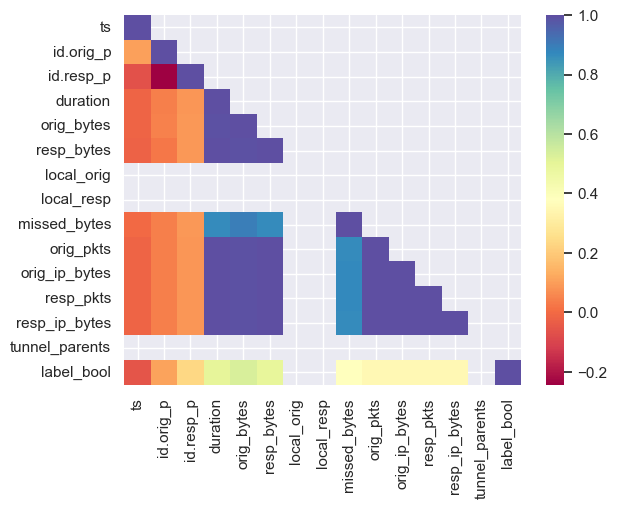

In [17]:
# display a heatmap of the simplified correlation matrix of just
# the numeric columns
hmap=sns.heatmap(df_lt, cmap="Spectral")

### Correlated columns chart

Display a list of the correlated columns in order from highest correlation (in magnitude, closest to -1 or 1) to lowest correlation (closest to zero). We don't care about the sign of the correlation, just the magnitude (absolute value).

In [18]:
# intialize an empty list to store results
res = []

# iterate through the column names in alphabetical order for horizontal
for col1 in sorted(df_lt.columns):

    # iterate through the column names in alphabetical order for vertial
    for col2 in sorted(df_lt.columns):
        # extract the correlation value
        try:
            #c1t = str(type(col1))
            #c2t = str(type(col2))

            #print(f'Column 1: {col1} is datatype {c1t}, Column 2: {col2} is datatype {c2t}')
            # ERROR ON NEXT LINE:
            val = df_lt[col1][col2]

            # if the column names match, then skip this one, their correlation 
            # will be one also skip if the answer is None / which is for the top
            # right symmetric portion
            #vt  = str(type(val))
            #vs  = str(val)
            #print(f'Value \"{val}\" is datatype {vt}')
            if type(val) != np.float64 or str(col1) == str(col2) or isnan(val):
                # print("SKIPPING THE ABOVE ONE")
                continue
        except:
            print(f'EXCEPTION ON col1 {col1} col2 {col2}')
            continue
       
        # create a name that describes the two columns
        new_col_name = f'{col1}__vs__{col2}'
       
        # add this to the resulting list
        # the first column is the absolute value of the correlation,

        # since I want to sort them by descending magnitude
        res.append([abs(val), val, new_col_name ])

# sort the list from highest magnitude to lowest
# the features with the highest correlation with each other may want
# to be removed
res = sorted(res, reverse=True)

# create a format string to design the output table
# < is left aligned     . is sig digs
CORRELATION_VS_COLNAME_FORMAT_STR = "{:>18.3}   {:<36}"

print("Most to least correlated features\n")
print("Correlation [-1,1]   Features/Columns")
print("-------------------------------------")
# loop through and display the relevant results:
for i, correlation, vs_col_name in res:
    print(CORRELATION_VS_COLNAME_FORMAT_STR.format(correlation, vs_col_name))

Most to least correlated features

Correlation [-1,1]   Features/Columns
-------------------------------------
               1.0   orig_pkts__vs__resp_pkts            
               1.0   duration__vs__orig_pkts             
               1.0   duration__vs__resp_pkts             
               1.0   orig_pkts__vs__orig_ip_bytes        
               1.0   orig_ip_bytes__vs__resp_pkts        
               1.0   duration__vs__orig_ip_bytes         
               1.0   resp_pkts__vs__resp_ip_bytes        
               1.0   orig_pkts__vs__resp_ip_bytes        
               1.0   duration__vs__resp_ip_bytes         
               1.0   orig_ip_bytes__vs__resp_ip_bytes    
             0.998   resp_bytes__vs__resp_ip_bytes       
             0.998   resp_bytes__vs__orig_ip_bytes       
             0.998   resp_bytes__vs__resp_pkts           
             0.998   resp_bytes__vs__orig_pkts           
             0.998   duration__vs__resp_bytes            
             0.993 